# From DPF-Post to DPF-Core

### DPF-Post

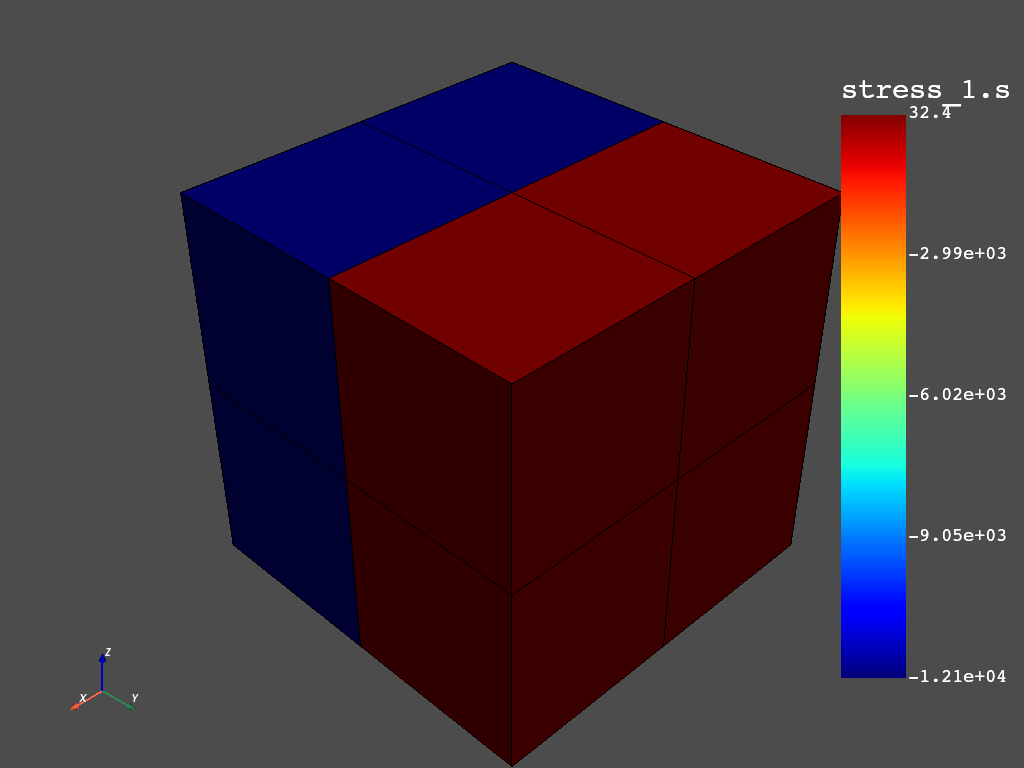

In [8]:
from ansys.dpf import post
solution = post.load_solution("d:/rst/static.rst")
stress = solution.stress(location=post.locations.elemental, time_scoping=[1]) 
s = stress.xx
s.plot_contour("time", 1)

### DPF-Core

server started at --address 10.110.2.65 --port 50052


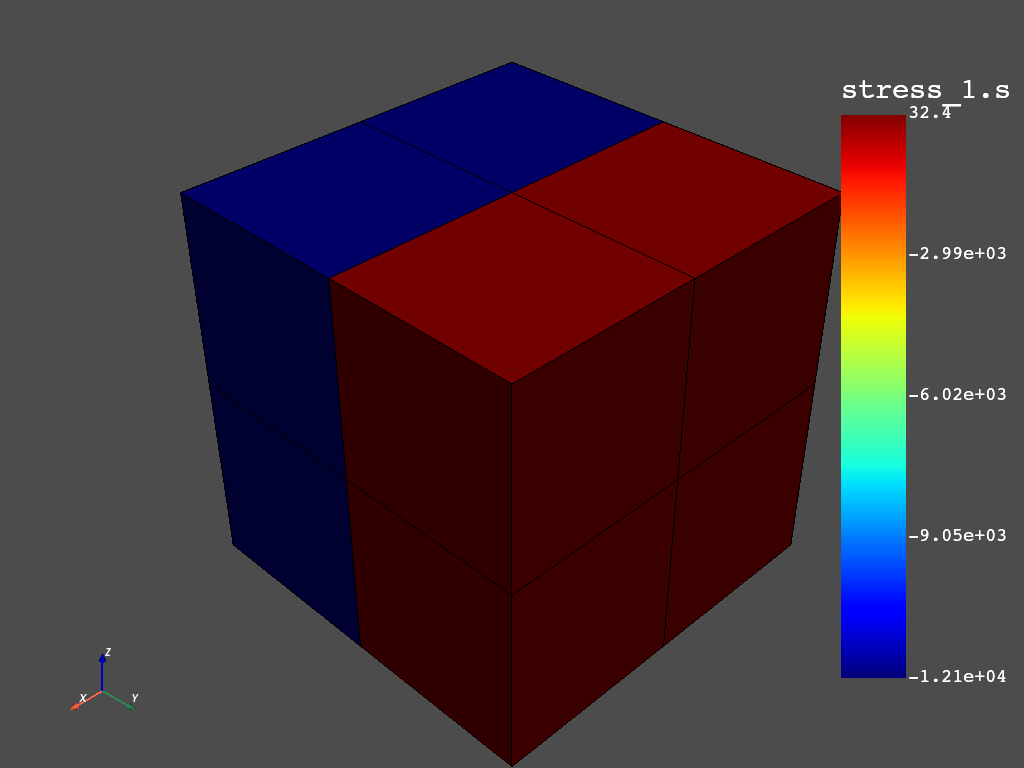

In [9]:
from ansys.dpf import core
core.start_local_server()

stress = core.operators.result.stress_X()
ds = core.DataSources("d:/rst/static.rst")
stress.inputs.data_sources.connect(ds)
stress.inputs.requested_location.connect('Elemental')

avg = core.operators.averaging.to_elemental_fc()
avg.inputs.fields_container.connect(stress.outputs.fields_container)
out = avg.outputs.fields_container()

mesh_op = core.operators.mesh.mesh_provider()
mesh_op.inputs.data_sources.connect(ds)
mesh = mesh_op.outputs.mesh()

mesh.plot(out)